# Dataset energético

O objetivo de cada grupo de trabalho passa por desenvolver o melhor modelo possível capaz de prever a quantidade de energia, em kWh, produzida por painéis solares e injectada, em redes elétricas existentes, a cada hora do dia.

O dataset utilizado nesta competição contém um conjunto de features sendo de destacar a feature Injeção na rede (kWh) . Esta feature indica, numa escala qualitativa (None, Low, Medium, High e Very_High), a quantidade de energia que se injectou na rede elétrica num determinado ponto temporal (i.e., numa determinada hora de um determinado dia). Se o valor desta feature for None, significa que não foi injectada nenhuma energia na rede (ou porque nada foi obtido dos painéis solares, ou porque toda a energia produzida pelos painéis foi consumida localmente). Um valor de Very_High implica a existência de uma quantidade muito alta de energia injectada na rede eléctrica naquele ponto temporal.

Para treino e tuning dos modelos de Machine Learning ser-vos-ão disponibilizados dois datasets com dados energéticos e dois datasets com dados meteorológicos. Tantos os datasets energéticos como os meteorológicos estão divididos por data, i.e., um dos datasets cobre o período de 2021 enquanto que o outro cobre todo o ano de 2022. Os grupos de trabalho poderão adicionar aos datasets qualquer atributo que achem relevante.

Para obtenção de scores na competição, os grupos de trabalho deverão prever, para cada registo do dataset de teste ("energia_202301-202304.csv"), a quantidade de energia que se injectou na rede elétrica num determinado ponto temporal, utilizando a escala None, Low, Medium, High e Very_High.

## The Data

### Treino

- energia_202109-202112.csv
- energia_202201-202212.csv
- meteo_202109-202112.csv
- meteo_202201-202212.csv

### Teste

- energia_202301-202304.csv
- meteo_202301-202304.csv

## Import Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as skl

In [149]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [151]:
from sklearn.metrics import classification_report

## Get the data

In [152]:
energia_2021 = pd.read_csv('daasbstp2023/energia_202109-202112.csv', encoding='latin-1')
energia_2022 = pd.read_csv('daasbstp2023/energia_202201-202212.csv', encoding='latin-1')
meteo_2021 = pd.read_csv('daasbstp2023/meteo_202109-202112.csv', encoding='latin-1')
meteo_2022 = pd.read_csv('daasbstp2023/meteo_202201-202212.csv', encoding='latin-1')

In [153]:
print(energia_2021.columns)
print(meteo_2021.columns)

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')


In [154]:
print('Energia 2021')
print(energia_2021.info())
print('\n')
print('Energia 2022')
print(energia_2022.info())
print('\n\n')
print('Meteo 2021')
print(meteo_2021.info())
print('Meteo 2022')
print(meteo_2022.info())

Energia 2021
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injeção na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB
None


Energia 2022
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null

In [155]:
print('Energia 2021')
energia_2021.head()

Energia 2021


Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injeção na rede (kWh)  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN

In [156]:
print('Energia 2022')
energia_2022.head()

Energia 2022


Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0  2022-01-01     0           0.0                    0.486                0.0   
1  2022-01-01     1           0.0                    0.429                0.0   
2  2022-01-01     2           0.0                    0.463                0.0   
3  2022-01-01     3           0.0                    0.545                0.0   
4  2022-01-01     4           0.0                    0.439                0.0   

  Injeção na rede (kWh)  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN

In [157]:
print('Meteo 2021')
meteo_2021.head()

Meteo 2021


dt                         dt_iso city_name   temp  feels_like  \
0  1630454400  2021-09-01 00:00:00 +0000 UTC     local  18.74       18.84   
1  1630458000  2021-09-01 01:00:00 +0000 UTC     local  18.73       18.83   
2  1630461600  2021-09-01 02:00:00 +0000 UTC     local  17.84       17.98   
3  1630465200  2021-09-01 03:00:00 +0000 UTC     local  18.27       18.40   
4  1630468800  2021-09-01 04:00:00 +0000 UTC     local  17.81       17.97   

   temp_min  temp_max  pressure  sea_level  grnd_level  humidity  wind_speed  \
0     15.72     20.34      1015        NaN         NaN        83        1.18   
1     15.72     20.34      1014        NaN         NaN        83        1.46   
2     16.72     20.34      1014        NaN         NaN        88        1.05   
3     16.68     20.34      1014        NaN         NaN        86        0.46   
4     16.12     20.34      1013        NaN         NaN        89        0.93   

   rain_1h  clouds_all weather_description  
0      NaN          78       broken clouds  
1      NaN          92     overcast clouds  
2      NaN          91     overcast clouds  
3     0.14          94          light rain  
4     1.26          95       moderate rain

In [158]:
print('Meteo 2022')
meteo_2022.info()

Meteo 2022
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   8760 non-null   int64  
 1   dt_iso               8760 non-null   object 
 2   city_name            8760 non-null   object 
 3   temp                 8760 non-null   float64
 4   feels_like           8760 non-null   float64
 5   temp_min             8760 non-null   float64
 6   temp_max             8760 non-null   float64
 7   pressure             8760 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             8760 non-null   int64  
 11  wind_speed           8760 non-null   float64
 12  rain_1h              1898 non-null   float64
 13  clouds_all           8760 non-null   int64  
 14  weather_description  8760 non-null   object 
dtypes: float64(8), int64(4), ob

## Join the Data

Criar novas colunas Data e Hora, nos datasets meteo_2021 e meteo_2022, com a informação da coluna dt_iso

Ex:
- dt_iso = 2021-09-01 00:00:00 +0000 UTC
    - Data = 2021-09-01
    - Hour = 00


In [159]:
meteo_2021['Data'] = meteo_2021['dt_iso'].str[:10]
meteo_2021['Hora'] = meteo_2021['dt_iso'].str[11:13].astype(int)
meteo_2022['Data'] = meteo_2022['dt_iso'].str[:10]
meteo_2022['Hora'] = meteo_2022['dt_iso'].str[11:13].astype(int)

In [160]:
print('Meteo 2021')
meteo_2021.info()

Meteo 2021
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             2928 non-null   int64  
 11  wind_speed           2928 non-null   float64
 12  rain_1h              537 non-null    float64
 13  clouds_all           2928 non-null   int64  
 14  weather_description  2928 non-null   object 
 15  Data                 2928 n

In [161]:
print('Meteo 2022')
meteo_2022.head()

Meteo 2022


dt                         dt_iso city_name   temp  feels_like  \
0  1640995200  2022-01-01 00:00:00 +0000 UTC     local  16.59       16.00   
1  1640998800  2022-01-01 01:00:00 +0000 UTC     local  16.59       16.00   
2  1641002400  2022-01-01 02:00:00 +0000 UTC     local  16.59       16.03   
3  1641006000  2022-01-01 03:00:00 +0000 UTC     local  13.59       12.75   
4  1641009600  2022-01-01 04:00:00 +0000 UTC     local  14.97       14.27   

   temp_min  temp_max  pressure  sea_level  grnd_level  humidity  wind_speed  \
0     16.21     16.72      1024        NaN         NaN        65        3.15   
1     16.21     16.72      1024        NaN         NaN        65        3.14   
2     15.67     16.72      1024        NaN         NaN        66        3.12   
3     11.61     16.16      1023        NaN         NaN        67        3.08   
4     14.72     15.66      1023        NaN         NaN        67        3.12   

   rain_1h  clouds_all weather_description        Data  Hora  
0      NaN          97     overcast clouds  2022-01-01     0  
1      NaN          58       broken clouds  2022-01-01     1  
2      NaN          23          few clouds  2022-01-01     2  
3      NaN          22          few clouds  2022-01-01     3  
4      NaN          15          few clouds  2022-01-01     4

Juntar os datasets tendo em conta os fields data e a hora.

In [162]:
# Merge the DataFrames based on "Data" and "Hora" columns
energia_meteo_2021 = pd.merge(energia_2021, meteo_2021, on=["Data", "Hora"])
energia_meteo_2022 = pd.merge(energia_2022, meteo_2022, on=["Data", "Hora"])

# Concatenate the merged DataFrames
energia_meteo = pd.concat([energia_meteo_2021, energia_meteo_2022])

# Save the merged data to a new CSV file
energia_meteo.to_csv("daasbstp2023/merged_data.csv", index=False)

# No enunciado avisa que None é quando não há infos, ao junta-los, os None viram NaN
energia_meteo['Injeção na rede (kWh)'].fillna('None', inplace=True)

In [163]:
energia_meteo.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)', 'dt', 'dt_iso',
       'city_name', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description'],
      dtype='object')

In [164]:
energia_meteo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    11016 non-null  object 
 6   dt                       11016 non-null  int64  
 7   dt_iso                   11016 non-null  object 
 8   city_name                11016 non-null  object 
 9   temp                     11016 non-null  float64
 10  feels_like               11016 non-null  float64
 11  temp_min                 11016 non-null  float64
 12  temp_max                 11016 non-null  float64
 13  pressure                 11016 non-null  int64  
 14  sea_level                0 n

In [165]:
energia_meteo.head()

Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injeção na rede (kWh)          dt                         dt_iso city_name  \
0                  None  1632873600  2021-09-29 00:00:00 +0000 UTC     local   
1                  None  1632877200  2021-09-29 01:00:00 +0000 UTC     local   
2                  None  1632880800  2021-09-29 02:00:00 +0000 UTC     local   
3                  None  1632884400  2021-09-29 03:00:00 +0000 UTC     local   
4                  None  1632888000  2021-09-29 04:00:00 +0000 UTC     local   

    temp  ...  temp_min  temp_max  pressure  sea_level  grnd_level  humidity  \
0  13.97  ...     11.45     14.04      1027        NaN         NaN        81   
1  13.48  ...     13.43     13.90      1028        NaN         NaN        82   
2  12.93  ...     12.72     13.43      1027        NaN         NaN        84   
3  12.61  ...     10.34     12.93      1027        NaN         NaN        85   
4  12.61  ...      9.79     12.93      1027        NaN         NaN        86   

   wind_speed  rain_1h  clouds_all  weather_description  
0        1.96      NaN          87      overcast clouds  
1        1.83      NaN          91      overcast clouds  
2        1.96      NaN          93      overcast clouds  
3        1.85      NaN          95      overcast clouds  
4        1.83      NaN          93      overcast clouds  

[5 rows x 21 columns]

Eliminar dt_iso e dt

In [166]:
energia_meteo.drop(['dt_iso'], axis=1, inplace=True)
energia_meteo.drop(['dt'], axis=1, inplace=True)

In [167]:
energia_meteo.nunique()

Data                        459
Hora                         24
Normal (kWh)               1282
Horário Económico (kWh)     851
Autoconsumo (kWh)           752
Injeção na rede (kWh)         5
city_name                     1
temp                       2382
feels_like                 2670
temp_min                    481
temp_max                    545
pressure                     41
sea_level                     0
grnd_level                    0
humidity                     82
wind_speed                  771
rain_1h                     367
clouds_all                  101
weather_description           8
dtype: int64

Como city_name apenas tem um valor único, a coluna será eliminada.

In [168]:
energia_meteo.drop(['city_name'], axis=1, inplace=True)

## Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

### 1. Missing Values

Data                           0
Hora                           0
Normal (kWh)                   0
Horário Económico (kWh)        0
Autoconsumo (kWh)              0
Injeção na rede (kWh)          0
temp                           0
feels_like                     0
temp_min                       0
temp_max                       0
pressure                       0
sea_level                  11016
grnd_level                 11016
humidity                       0
wind_speed                     0
rain_1h                     8732
clouds_all                     0
weather_description            0
dtype: int64

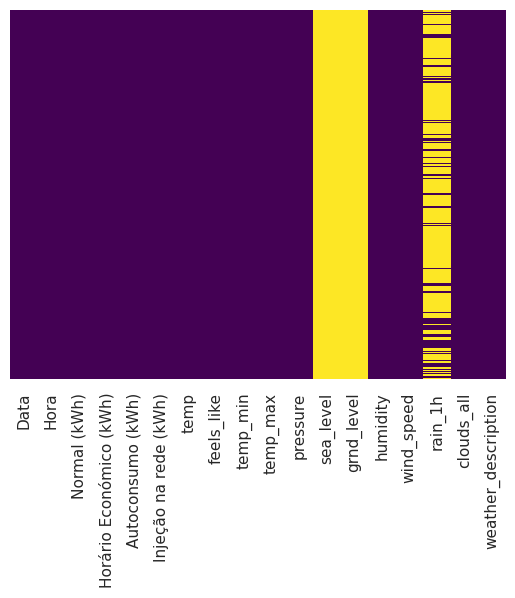

In [169]:
sns.heatmap(energia_meteo.isnull(),yticklabels=False,cbar=False,cmap='viridis')
energia_meteo.isnull().sum()

#### - Drop or fill

Começamos por eliminar as colunas que contém todos os vals a null - sea_level e grnd_level já que não contêm nenhuma informação

In [170]:
energia_meteo.drop(['sea_level','grnd_level'],axis=1,inplace=True)
energia_meteo.head()

Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injeção na rede (kWh)   temp  feels_like  temp_min  temp_max  pressure  \
0                  None  13.97       13.54     11.45     14.04      1027   
1                  None  13.48       13.02     13.43     13.90      1028   
2                  None  12.93       12.47     12.72     13.43      1027   
3                  None  12.61       12.15     10.34     12.93      1027   
4                  None  12.61       12.17      9.79     12.93      1027   

   humidity  wind_speed  rain_1h  clouds_all weather_description  
0        81        1.96      NaN          87     overcast clouds  
1        82        1.83      NaN          91     overcast clouds  
2        84        1.96      NaN          93     overcast clouds  
3        85        1.85      NaN          95     overcast clouds  
4        86        1.83      NaN          93     overcast clouds

Agora vamos analizar a feature rain_1h

In [171]:
energia_meteo['rain_1h'].describe()

count    2284.000000
mean        0.896642
std         1.079381
min         0.100000
25%         0.210000
50%         0.460000
75%         1.092500
max         7.450000
Name: rain_1h, dtype: float64

Teoria: os NaN provavelmente provêem de horas sem chuva, logo, podemos substituir por 0

Então vamos testar colocar os vals nulls de rain_1h a zero

In [172]:
energia_meteo_n1 = energia_meteo.copy()

In [173]:
energia_meteo.fillna(0,inplace=True)

In [174]:
energia_meteo.head()

Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injeção na rede (kWh)   temp  feels_like  temp_min  temp_max  pressure  \
0                  None  13.97       13.54     11.45     14.04      1027   
1                  None  13.48       13.02     13.43     13.90      1028   
2                  None  12.93       12.47     12.72     13.43      1027   
3                  None  12.61       12.15     10.34     12.93      1027   
4                  None  12.61       12.17      9.79     12.93      1027   

   humidity  wind_speed  rain_1h  clouds_all weather_description  
0        81        1.96      0.0          87     overcast clouds  
1        82        1.83      0.0          91     overcast clouds  
2        84        1.96      0.0          93     overcast clouds  
3        85        1.85      0.0          95     overcast clouds  
4        86        1.83      0.0          93     overcast clouds

Data                       0
Hora                       0
Normal (kWh)               0
Horário Económico (kWh)    0
Autoconsumo (kWh)          0
Injeção na rede (kWh)      0
temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
humidity                   0
wind_speed                 0
rain_1h                    0
clouds_all                 0
weather_description        0
dtype: int64

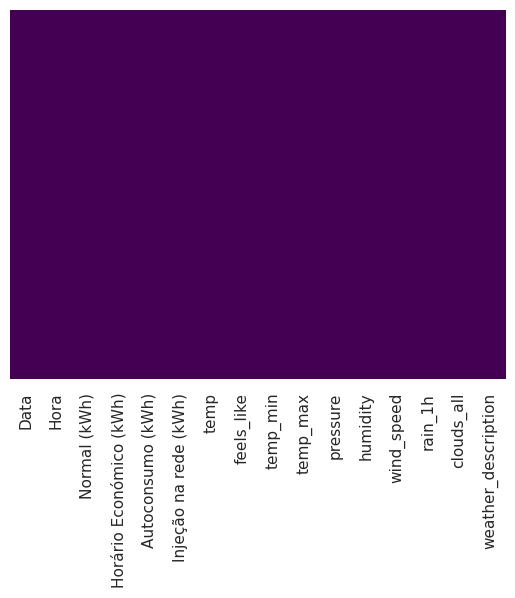

In [175]:
sns.heatmap(energia_meteo.isnull(),yticklabels=False,cbar=False,cmap='viridis')
energia_meteo.isnull().sum()

## Handling Categorical Features

Injeção na rede (kWh)
None         7777
High         1103
Medium       1098
Very High     606
Low           432
Name: count, dtype: int64


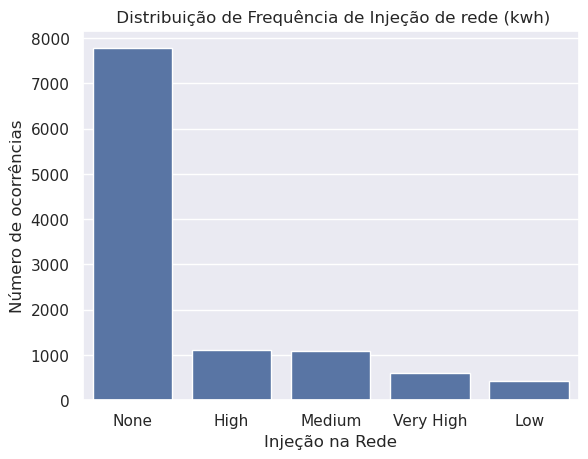

In [176]:
inj_rede_count = energia_meteo['Injeção na rede (kWh)'].value_counts()
print(inj_rede_count)
# remove None count
# inj_rede_count = inj_rede_count.drop('None')
sns.set(style="darkgrid")
sns.barplot(x=inj_rede_count.index, y=inj_rede_count.values)
plt.title(' Distribuição de Frequência de Injeção de rede (kwh)')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Injeção na Rede', fontsize=12)
plt.show()

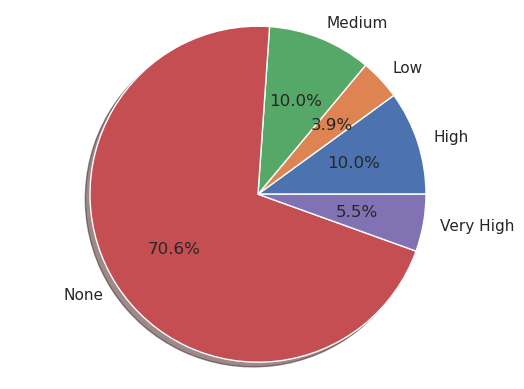

In [177]:
labels = energia_meteo['Injeção na rede (kWh)'].astype('category').cat.categories.tolist()
counts = energia_meteo['Injeção na rede (kWh)'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

### a) weather_description

In [178]:
energia_meteo['weather_description'].unique()

array(['overcast clouds', 'broken clouds', 'few clouds', 'sky is clear',
       'scattered clouds', 'light rain', 'moderate rain',
       'heavy intensity rain'], dtype=object)

In [179]:
replace_map = {'weather_description':
               {'overcast clouds':0, 
                'broken clouds': 1,
                'few clouds': 2,
                'sky is clear': 3,
                'scattered clouds': 4,
                'light rain': 5,
                'moderate rain': 6,
                'heavy intensity rain': 7,}}

In [180]:
energia_meteo.replace(replace_map, inplace=True)
energia_meteo.head()

Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injeção na rede (kWh)   temp  feels_like  temp_min  temp_max  pressure  \
0                  None  13.97       13.54     11.45     14.04      1027   
1                  None  13.48       13.02     13.43     13.90      1028   
2                  None  12.93       12.47     12.72     13.43      1027   
3                  None  12.61       12.15     10.34     12.93      1027   
4                  None  12.61       12.17      9.79     12.93      1027   

   humidity  wind_speed  rain_1h  clouds_all  weather_description  
0        81        1.96      0.0          87                    0  
1        82        1.83      0.0          91                    0  
2        84        1.96      0.0          93                    0  
3        85        1.85      0.0          95                    0  
4        86        1.83      0.0          93                    0

### b) Injeção na rede

- tem ordem
- modelo não intreperta essa ordem

1. Label encoding

In [181]:
energia_meteo_decimal = energia_meteo.copy()
energia_meteo_label = energia_meteo.copy()

In [182]:
replace_map={'Injeção na rede (kWh)': {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}}

In [183]:
energia_meteo_decimal.replace(replace_map, inplace=True)
energia_meteo_decimal.head()

Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

   Injeção na rede (kWh)   temp  feels_like  temp_min  temp_max  pressure  \
0                      0  13.97       13.54     11.45     14.04      1027   
1                      0  13.48       13.02     13.43     13.90      1028   
2                      0  12.93       12.47     12.72     13.43      1027   
3                      0  12.61       12.15     10.34     12.93      1027   
4                      0  12.61       12.17      9.79     12.93      1027   

   humidity  wind_speed  rain_1h  clouds_all  weather_description  
0        81        1.96      0.0          87                    0  
1        82        1.83      0.0          91                    0  
2        84        1.96      0.0          93                    0  
3        85        1.85      0.0          95                    0  
4        86        1.83      0.0          93                    0

2. Separar por colunas

In [184]:
energia_meteo_label['None'] = np.where(energia_meteo_label['Injeção na rede (kWh)'].str.contains("None"), 1, 0)
energia_meteo_label['Low'] = np.where(energia_meteo_label['Injeção na rede (kWh)'].str.contains("Low"), 1, 0)
energia_meteo_label['Medium'] = np.where(energia_meteo_label['Injeção na rede (kWh)'].str.contains("Medium"), 1, 0)
energia_meteo_label['High'] = np.where(energia_meteo_label['Injeção na rede (kWh)'].str.contains("High"), 1, 0)
energia_meteo_label['Very_High'] = np.where(energia_meteo_label['Injeção na rede (kWh)'].str.contains("Very_High"), 1, 0)

In [185]:
energia_meteo_label.head()

Data  Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injeção na rede (kWh)   temp  feels_like  temp_min  temp_max  ...  humidity  \
0                  None  13.97       13.54     11.45     14.04  ...        81   
1                  None  13.48       13.02     13.43     13.90  ...        82   
2                  None  12.93       12.47     12.72     13.43  ...        84   
3                  None  12.61       12.15     10.34     12.93  ...        85   
4                  None  12.61       12.17      9.79     12.93  ...        86   

   wind_speed  rain_1h  clouds_all  weather_description  None  Low  Medium  \
0        1.96      0.0          87                    0     1    0       0   
1        1.83      0.0          91                    0     1    0       0   
2        1.96      0.0          93                    0     1    0       0   
3        1.85      0.0          95                    0     1    0       0   
4        1.83      0.0          93                    0     1    0       0   

   High  Very_High  
0     0          0  
1     0          0  
2     0          0  
3     0          0  
4     0          0  

[5 rows x 21 columns]

## Tratamento de Datas

In [186]:
energia_meteo_data = energia_meteo_decimal.copy()
# energia_meteo_data = energia_meteo_label.copy()
energia_meteo['Data'] = pd.to_datetime(energia_meteo['Data'], format='%Y-%m-%d', errors='coerce')
energia_meteo_data['Data'] = pd.to_datetime(energia_meteo_data['Data'], format='%Y-%m-%d', errors='coerce')

In [187]:
assert energia_meteo['Data'].isnull().sum() == 0, 'missing dates'
assert energia_meteo_data['Data'].isnull().sum() == 0, 'missing dates'

In [188]:
energia_meteo['Data'].head()

0   2021-09-29
1   2021-09-29
2   2021-09-29
3   2021-09-29
4   2021-09-29
Name: Data, dtype: datetime64[ns]

In [189]:
energia_meteo_data['Data'].head()

0   2021-09-29
1   2021-09-29
2   2021-09-29
3   2021-09-29
4   2021-09-29
Name: Data, dtype: datetime64[ns]

In [190]:
print(energia_meteo_data.dtypes)

Data                       datetime64[ns]
Hora                                int64
Normal (kWh)                      float64
Horário Económico (kWh)           float64
Autoconsumo (kWh)                 float64
Injeção na rede (kWh)               int64
temp                              float64
feels_like                        float64
temp_min                          float64
temp_max                          float64
pressure                            int64
humidity                            int64
wind_speed                        float64
rain_1h                           float64
clouds_all                          int64
weather_description                 int64
dtype: object


In [191]:
energia_meteo_data['year'] = energia_meteo_data['Data'].dt.year
energia_meteo_data['month'] = energia_meteo_data['Data'].dt.month
energia_meteo_data['day'] = energia_meteo_data['Data'].dt.day

In [192]:
energia_meteo_data.drop(['Data'], axis=1, inplace=True)

## Exploratory Data Analysis

In [193]:
energia_meteo.nunique()

Data                        459
Hora                         24
Normal (kWh)               1282
Horário Económico (kWh)     851
Autoconsumo (kWh)           752
Injeção na rede (kWh)         5
temp                       2382
feels_like                 2670
temp_min                    481
temp_max                    545
pressure                     41
humidity                     82
wind_speed                  771
rain_1h                     368
clouds_all                  101
weather_description           8
dtype: int64

<Axes: >

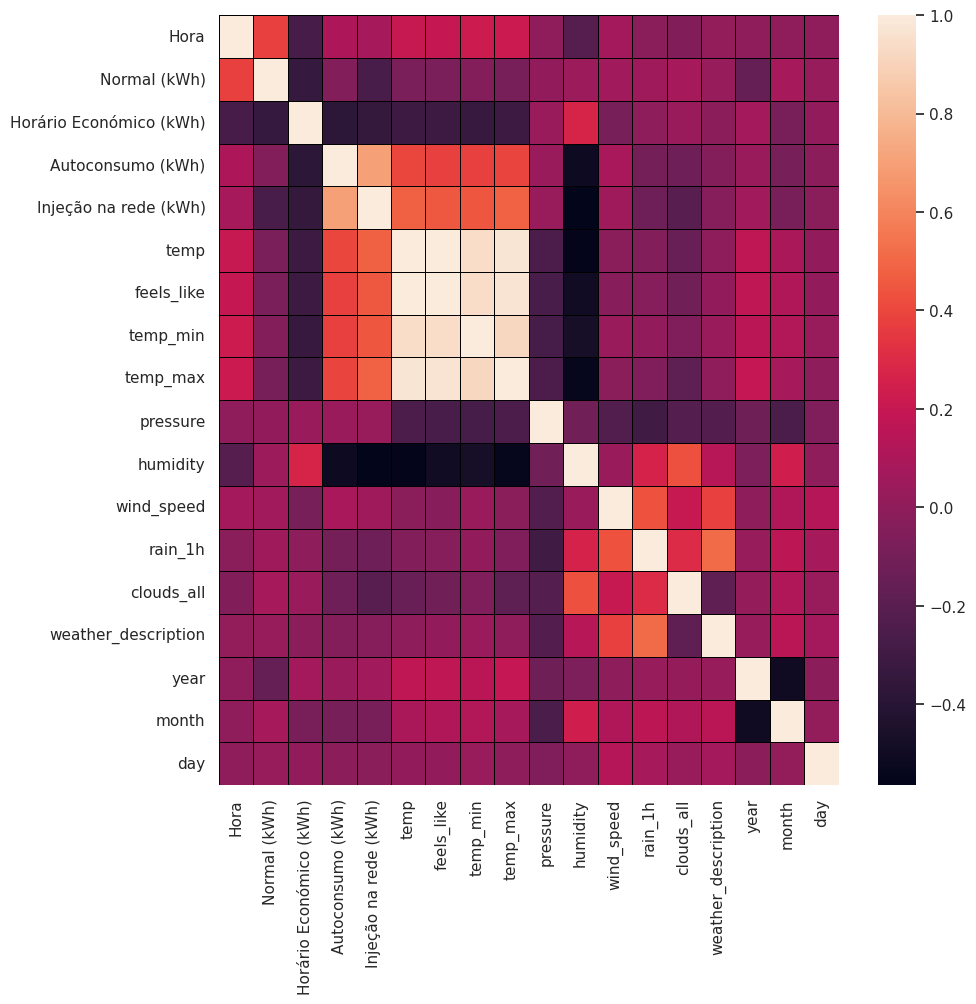

In [194]:
fig = plt.figure(figsize = (10,10))
incidents_corr = energia_meteo_data.corr(method='pearson')
sns.heatmap(incidents_corr,linecolor='black', linewidths=0.5)

- temp, feels_like, temp_min, temp_max são altamente correlacionadas, vamos explorá-las, visto que em princípio dá para manter apenas uma destas colunas - temp

In [195]:
energia_meteo_data.drop(['feels_like'], axis=1, inplace=True)
energia_meteo_data.drop(['temp_min'], axis=1, inplace=True)
energia_meteo_data.drop(['temp_max'], axis=1, inplace=True)

<Axes: >

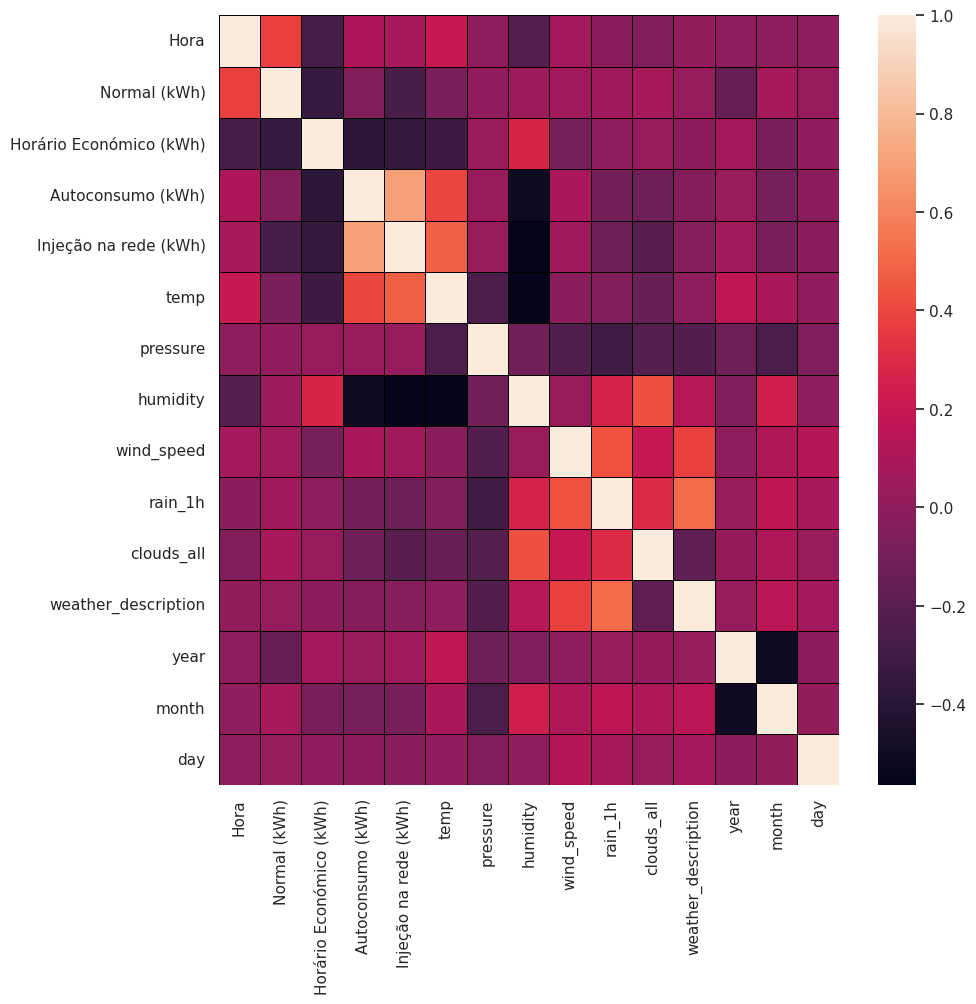

In [196]:
fig = plt.figure(figsize = (10,10))
incidents_corr = energia_meteo_data.corr(method='pearson')
sns.heatmap(incidents_corr,linecolor='black', linewidths=0.5)

- inversamente proporcionais: humidade com [autoconsumo, injeção na rede, temp]
- autoconsumo e injeção na rede são diretamente proporcionais

/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


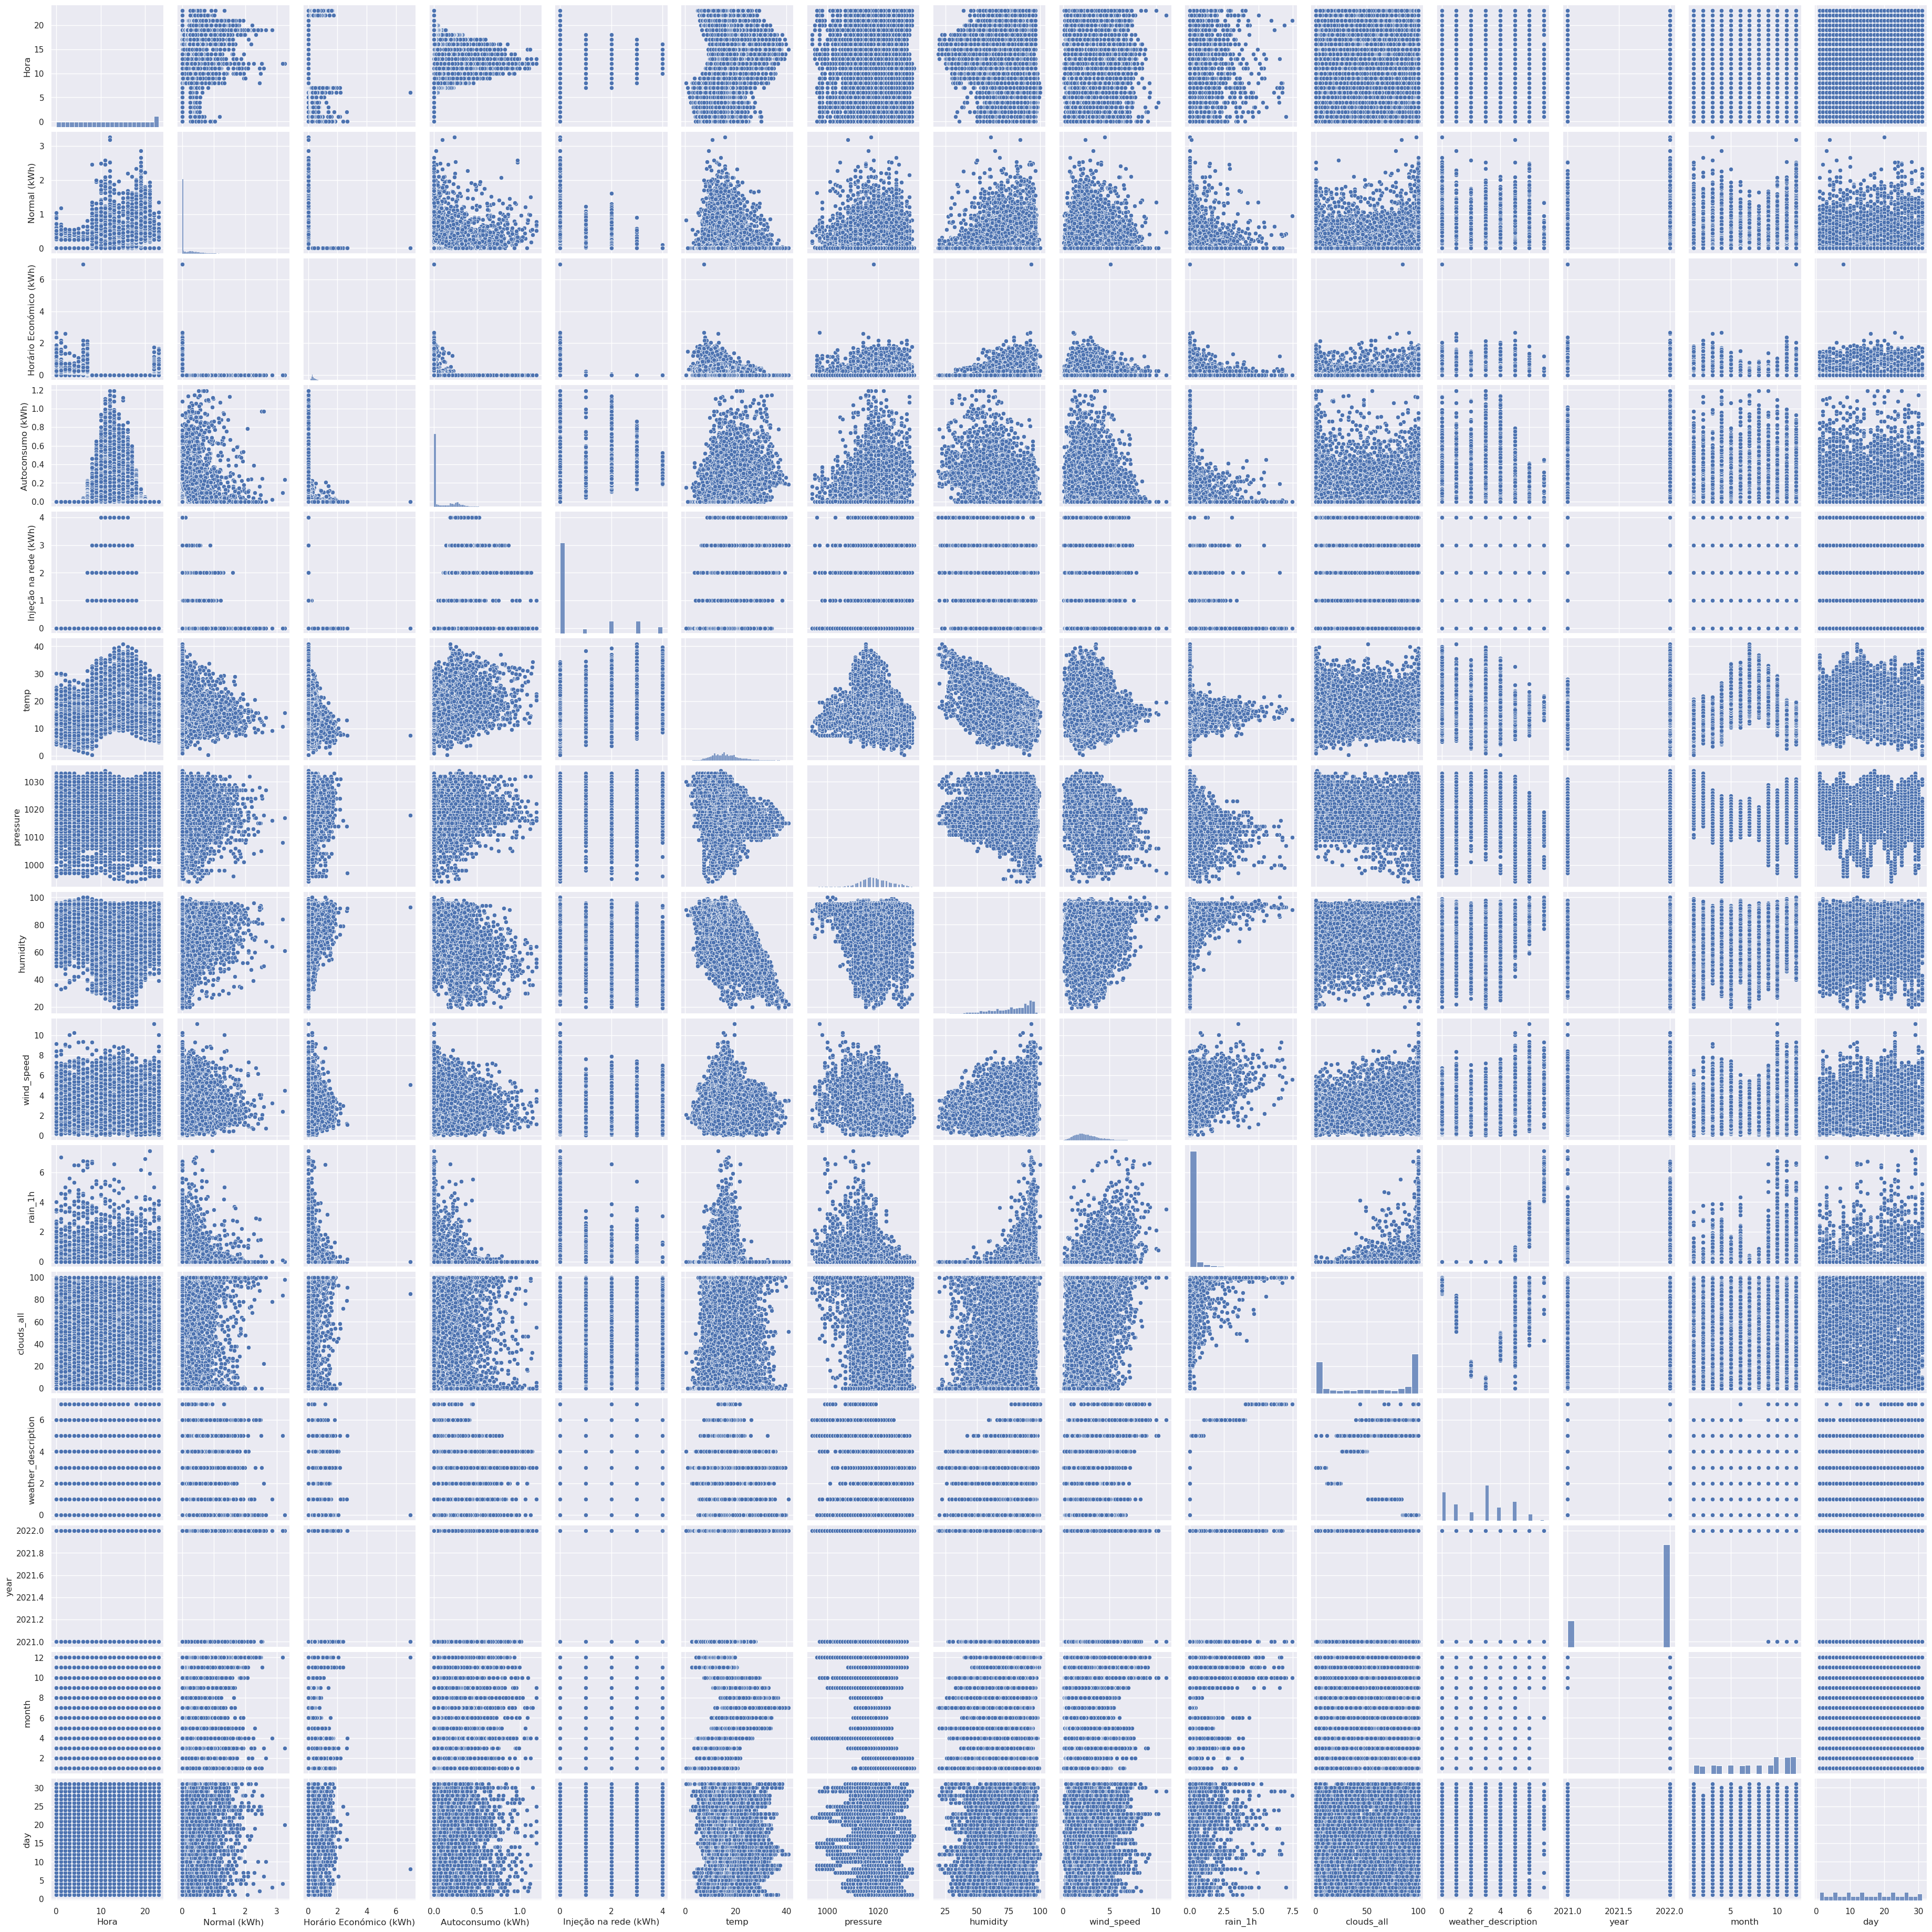

In [197]:
sns.pairplot(energia_meteo_data)

### Joinplot para analisar humidade com autoconsumo

In [198]:
energia_meteo_data.head()

Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)  \
0     0           0.0                      0.0                0.0   
1     1           0.0                      0.0                0.0   
2     2           0.0                      0.0                0.0   
3     3           0.0                      0.0                0.0   
4     4           0.0                      0.0                0.0   

   Injeção na rede (kWh)   temp  pressure  humidity  wind_speed  rain_1h  \
0                      0  13.97      1027        81        1.96      0.0   
1                      0  13.48      1028        82        1.83      0.0   
2                      0  12.93      1027        84        1.96      0.0   
3                      0  12.61      1027        85        1.85      0.0   
4                      0  12.61      1027        86        1.83      0.0   

   clouds_all  weather_description  year  month  day  
0          87                    0  2021      9   29  
1          91                    0  2021      9   29  
2          93                    0  2021      9   29  
3          95                    0  2021      9   29  
4          93                    0  2021      9   29

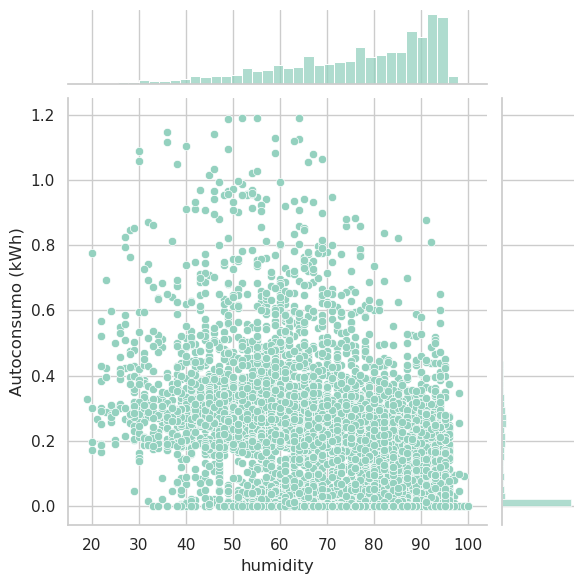

In [199]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='humidity',y='Autoconsumo (kWh)',data=energia_meteo_data)

### Joinplot para analisar humidade com injeção de rede

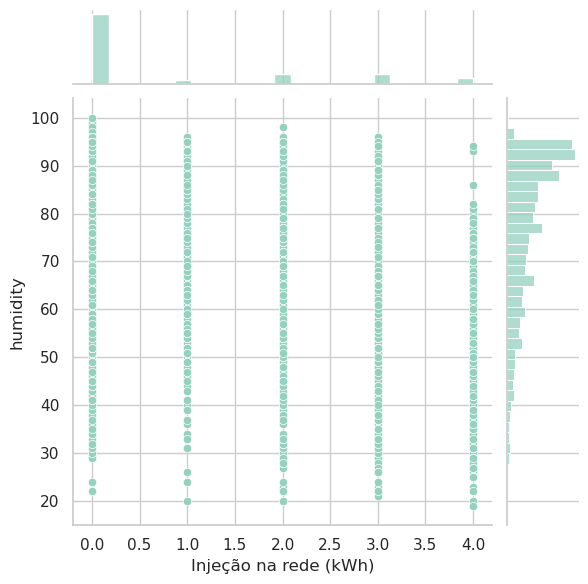

In [200]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='Injeção na rede (kWh)',y='humidity',data=energia_meteo_data)

- tem uma humidade bem distribuida xD

### Joinplot para analisar humidade com temp

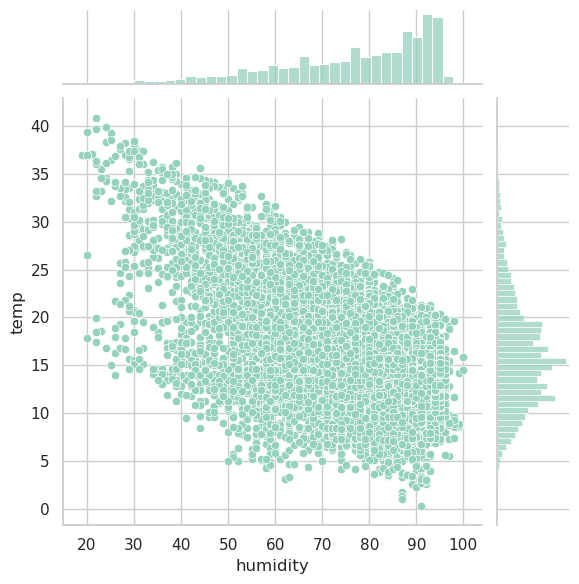

In [201]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='humidity',y='temp',data=energia_meteo_data)

- com o aumento da humidade, a temperatura desce

### Joinplot para analisar injeção na rede com autoconsumo

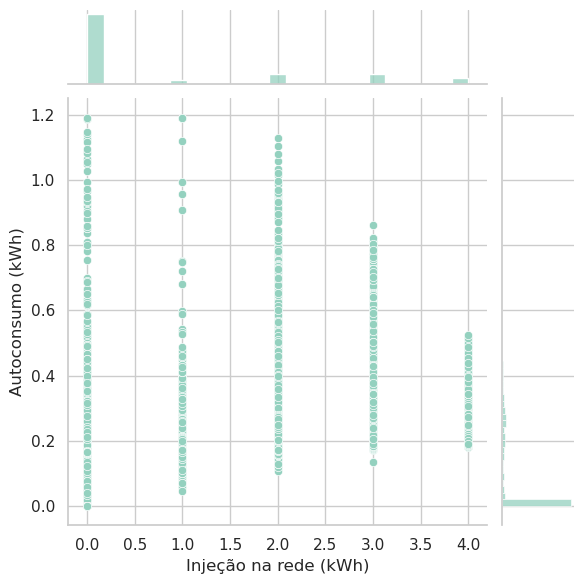

In [202]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='Injeção na rede (kWh)',y='Autoconsumo (kWh)',data=energia_meteo_data)

## Train Test Split

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
energia_meteo_data.columns

Index(['Hora', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'temp', 'pressure', 'humidity', 'wind_speed',
       'rain_1h', 'clouds_all', 'weather_description', 'year', 'month', 'day'],
      dtype='object')

In [205]:
X = energia_meteo_data.drop('Injeção na rede (kWh)', axis=1)
y = energia_meteo_data['Injeção na rede (kWh)']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

/tmp/ipykernel_5107/4282820180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Injeção na rede (kWh)',data=aux,palette='RdBu_r')


<Axes: xlabel='Injeção na rede (kWh)', ylabel='count'>

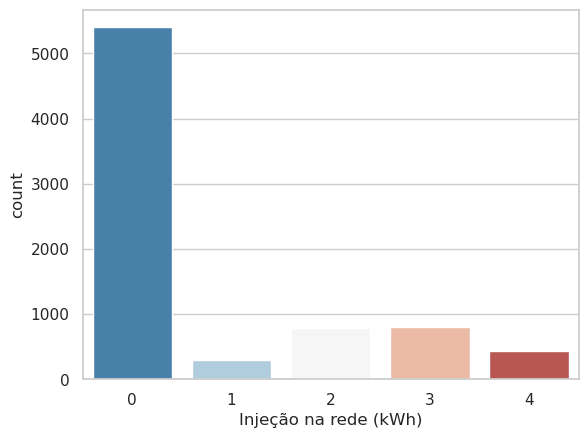

In [207]:
sns.set_style('whitegrid')
aux = pd.DataFrame(y_train,columns=['Injeção na rede (kWh)'])
sns.countplot(x='Injeção na rede (kWh)',data=aux,palette='RdBu_r')

In [208]:
# show number of values for each colunm of the train dataset
print(aux['Injeção na rede (kWh)'].value_counts())

Injeção na rede (kWh)
0    5400
3     800
2     782
4     432
1     297
Name: count, dtype: int64


/tmp/ipykernel_5107/3924753907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Injeção na rede (kWh)',data=aux,palette='RdBu_r')


<Axes: xlabel='Injeção na rede (kWh)', ylabel='count'>

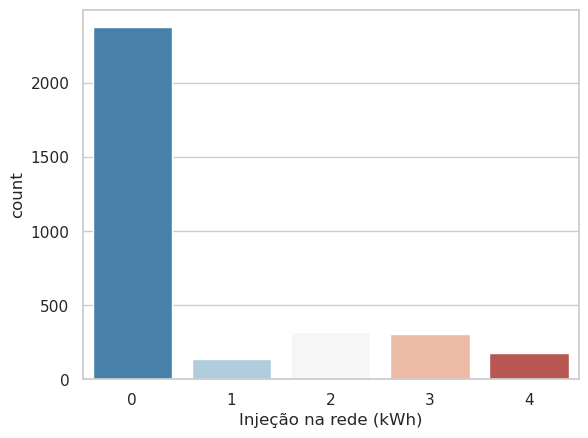

In [209]:
sns.set_style('whitegrid')
aux = pd.DataFrame(y_test,columns=['Injeção na rede (kWh)'])
sns.countplot(x='Injeção na rede (kWh)',data=aux,palette='RdBu_r')

In [210]:
print(aux['Injeção na rede (kWh)'].value_counts())

Injeção na rede (kWh)
0    2377
2     316
3     303
4     174
1     135
Name: count, dtype: int64


como os racios estão praticamente iguais, é uma boa partição

## Support Vector Machine

### Set up the dataframe

In [211]:
energia_meteo_data['Injeção na rede (kWh)']

0       0
1       0
2       0
3       0
4       0
       ..
8755    0
8756    0
8757    0
8758    0
8759    0
Name: Injeção na rede (kWh), Length: 11016, dtype: int64

In [212]:
df_target = pd.DataFrame(energia_meteo_data['Injeção na rede (kWh)'])

df_target.head()

Injeção na rede (kWh)
0                      0
1                      0
2                      0
3                      0
4                      0

## Train the Support Vector Classifier

#### 10-Fold Cross Validation

In [213]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [214]:
# TODO - testar cv
cross_valid_model = SVC(random_state=2023)
scores = cross_val_score(cross_valid_model, energia_meteo_data, np.ravel(df_target), cv=10)
scores

array([0.70598911, 0.70598911, 0.70598911, 0.70598911, 0.70598911,
       0.70598911, 0.70663034, 0.70572207, 0.70572207, 0.70572207])

In [215]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.00


And now without Cross Validation:

In [216]:
model = SVC(random_state=2023)

In [217]:
model.fit(X_train, y_train)

SVC(random_state=2023)

### Predictions and evaluations

In [218]:
predictions = model.predict(X_test)

In [219]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [220]:
print("%0.2f accuracy" % accuracy_score(y_test,predictions))

0.72 accuracy


In [221]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      2377
           1       0.00      0.00      0.00       135
           2       0.00      0.00      0.00       316
           3       0.00      0.00      0.00       303
           4       0.00      0.00      0.00       174

    accuracy                           0.72      3305
   macro avg       0.14      0.20      0.17      3305
weighted avg       0.52      0.72      0.60      3305



/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

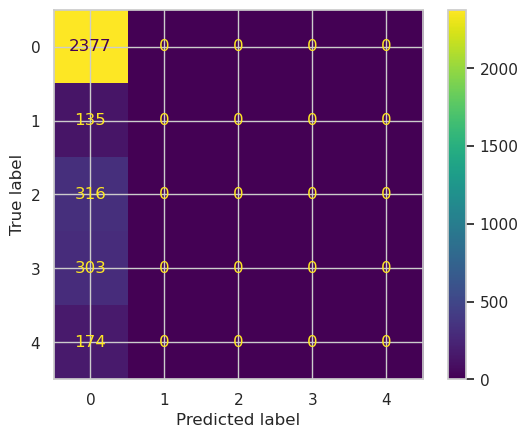

In [222]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

## Building a Logistic Regression Model

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import time

#### newton-cg

In [224]:
starttime = time.process_time()

logmodel1 = LogisticRegression(random_state=2022, solver='newton-cg')
print(logmodel1)
logmodel1.fit(X_train, y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(random_state=2022, solver='newton-cg')
Time spent: 1.913564201000014 seconds


/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [225]:
predictions1 = logmodel1.predict(X_test)

#### lbfgs

In [226]:
starttime = time.process_time()

logmodel2 = LogisticRegression(random_state=2022, solver='lbfgs')
print(logmodel2)
logmodel2.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(random_state=2022)
Time spent: 0.08181273899998587 seconds


/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [227]:
predictions2 = logmodel2.predict(X_test)

#### liblinear

In [228]:
starttime = time.process_time()

logmodel3 = LogisticRegression(random_state=2022, solver='liblinear')
print()
logmodel3.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")


Time spent: 0.324118440999996 seconds


In [229]:
predictions3 = logmodel3.predict(X_test)

#### sag

In [230]:
starttime = time.process_time()

logmodel4 = LogisticRegression(random_state=2022, solver='sag')
print()
logmodel4.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

Time spent: 0.2542618709999829 seconds


/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [231]:
predictions4 = logmodel4.predict(X_test)

#### saga

In [232]:
starttime = time.process_time()

logmodel5 = LogisticRegression(random_state=2022, solver='saga')
print()
logmodel5.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")


Time spent: 0.31283539800000426 seconds


/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [233]:
predictions5 = logmodel5.predict(X_test)

### Evaluation

In [234]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [235]:
print("With 'newton-cg': \n", classification_report(y_test, predictions1))
print("With 'lbfgs': \n", classification_report(y_test, predictions2))
print("With 'liblinear': \n", classification_report(y_test, predictions3))
print("With 'sag': \n", classification_report(y_test, predictions4))
print("With 'saga': \n", classification_report(y_test, predictions5))

With 'newton-cg': 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2377
           1       0.00      0.00      0.00       135
           2       0.53      0.52      0.53       316
           3       0.50      0.65      0.56       303
           4       0.49      0.37      0.42       174

    accuracy                           0.84      3305
   macro avg       0.49      0.51      0.50      3305
weighted avg       0.81      0.84      0.82      3305

With 'lbfgs': 
               precision    recall  f1-score   support

           0       0.78      0.96      0.86      2377
           1       0.00      0.00      0.00       135
           2       0.28      0.03      0.05       316
           3       0.31      0.33      0.32       303
           4       0.10      0.01      0.01       174

    accuracy                           0.73      3305
   macro avg       0.29      0.27      0.25      3305
weighted avg       0.62      0.73      0.

/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

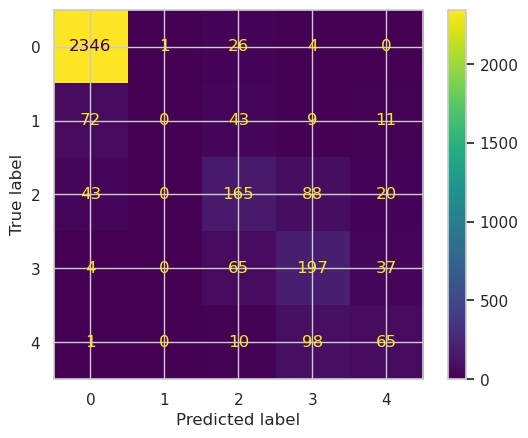

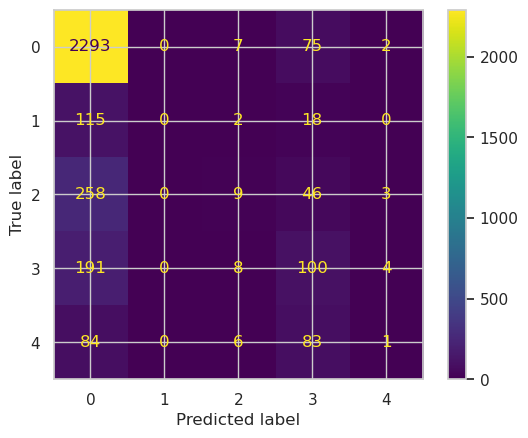

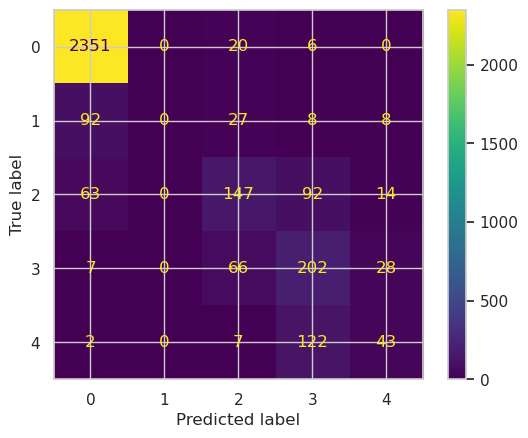

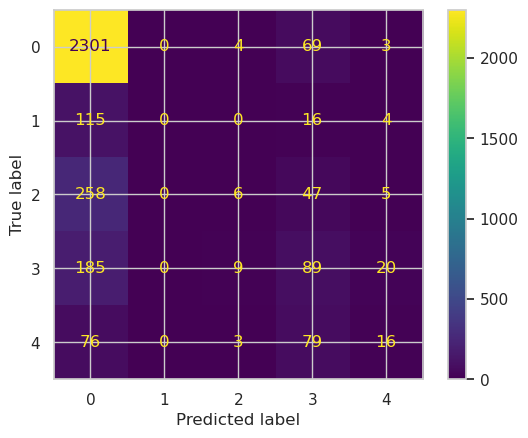

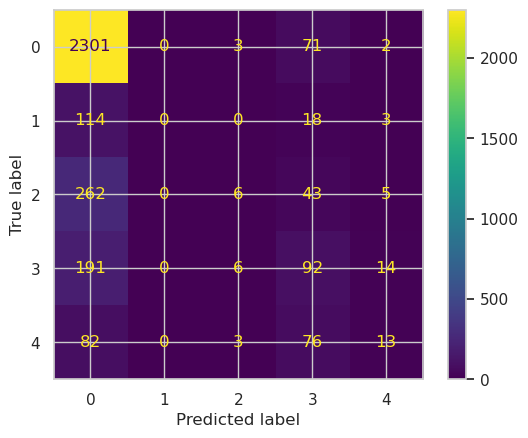

In [236]:
#Get the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions1)
ConfusionMatrixDisplay.from_predictions(y_test, predictions2)
ConfusionMatrixDisplay.from_predictions(y_test, predictions3)
ConfusionMatrixDisplay.from_predictions(y_test, predictions4)
ConfusionMatrixDisplay.from_predictions(y_test, predictions5)
plt.show()

## Artificial Neural Network

### EDA

In [237]:
# %pip install tensorflow
# %pip install --upgrade keras
# %pip install scikeras[tensorflow]

In [238]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

2023-12-07 15:03:03.918667: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-07 15:03:04.025492: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Structure the MLP

In [239]:
def build_model(activation = 'relu', learning_rate = 0.01):
    model = Sequential()
    model.add(Dense(16, input_dim = 5, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = activation)) #output
    
    #Compile the model
    model.compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse']      
    )
    
    return model

Build the model:

In [240]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


### GridSearchCV

In [241]:
from sklearn.model_selection import GridSearchCV, KFold

In [242]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [243]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2021)

In [244]:
model = KerasRegressor(model = build_model, batch_size = 32, validation_split = 0.2, epochs = 20)

In [245]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'neg_mean_absolute_error', refit = 'True', verbose = 1)

In [246]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20


Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20


ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_9" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_10" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_11" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_12" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_13" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_14" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file_s0gq9rz.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_15" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 14)



Best results

In [ ]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

In [ ]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [ ]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

Use the best model

In [ ]:
best_mlp_model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), verbose = 1)

In [ ]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pd.DataFrame(best_mlp_model.history_).plot(figsize = (8, 5))
plt.show()

Predictions

In [ ]:
predictions = best_mlp_model.predict(X_test)

In [ ]:
print(predictions[:5])

Evaluate the model

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
def real_predicted_viz(limit):
    plt.figure(figsize = (14, 6))
    plt.plot(y_test[:limit], color = 'green', label = 'Actual')
    plt.plot(predictions[:limit], color = 'red', label = 'Predicted')
    plt.grid(alpha = 0.3)
    plt.xlabel('Houses')
    plt.ylabel('Price')
    plt.title('Real vs Predicted')
    plt.legend()
    plt.show()

In [ ]:
real_predicted_viz(200)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=2023)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2023)

In [ ]:
dt_score = dt_model.score(X_test, y_test)

In [ ]:
print("Accuracy: %0.2f" % (dt_score*100))

Accuracy: 86.05


In [ ]:
dt_predictions = dt_model.predict(X_test)

In [ ]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2377
           1       0.31      0.30      0.31       135
           2       0.57      0.56      0.57       316
           3       0.64      0.65      0.65       303
           4       0.74      0.74      0.74       174

    accuracy                           0.86      3305
   macro avg       0.65      0.65      0.65      3305
weighted avg       0.86      0.86      0.86      3305



In [ ]:
results = {'DT': dt_score}

## Support Vector Machine

In [ ]:
svm_model = SVC(random_state=2022)

In [ ]:
svm_model.fit(X_train, y_train)

SVC(random_state=2022)

In [ ]:
svm_score = svm_model.score(X_test, y_test)

In [ ]:
print("Accuracy: %.2f%%" % (svm_score * 100))

Accuracy: 71.92%


In [ ]:
svm_predictions = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      2377
           1       0.00      0.00      0.00       135
           2       0.00      0.00      0.00       316
           3       0.00      0.00      0.00       303
           4       0.00      0.00      0.00       174

    accuracy                           0.72      3305
   macro avg       0.14      0.20      0.17      3305
weighted avg       0.52      0.72      0.60      3305



/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [ ]:
results['SVM'] = svm_score

## Bagging

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=2023)

In [ ]:
bg_model = BaggingClassifier(estimator=dt_model, bootstrap=True)

In [ ]:
n_estimators = [10, 40,60,80,100,60]

In [ ]:
parameters = {'n_estimators': n_estimators}

In [ ]:
grid_bg = GridSearchCV(estimator = bg_model, param_grid = parameters, cv = sss)

In [ ]:
grid_bg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=2023, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=2023)),
             param_grid={'n_estimators': [10, 40, 60, 80, 100, 60]})

In [ ]:
bst_bg_model = grid_bg.best_estimator_

In [ ]:
print(bst_bg_model)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=2023),
                  n_estimators=60)


In [ ]:
bst_bg_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=2023),
                  n_estimators=60)

In [ ]:
bst_bg_score = bst_bg_model.score(X_test, y_test)

In [ ]:
print("Accuracy: %.2f%%" % (bst_bg_score *100))

Accuracy: 89.14%


In [ ]:
bg_predictions = bst_bg_model.predict(X_test)

In [ ]:
print(classification_report(y_test, bg_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2377
           1       0.51      0.27      0.36       135
           2       0.65      0.67      0.66       316
           3       0.70      0.74      0.72       303
           4       0.82      0.76      0.79       174

    accuracy                           0.89      3305
   macro avg       0.73      0.69      0.70      3305
weighted avg       0.88      0.89      0.89      3305



In [ ]:
results['Bagg']= bst_bg_score

## Random Forest

In [ ]:
rf_model = RandomForestClassifier(bootstrap=False, max_depth=2, verbose=1)

In [ ]:
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=False, max_depth=2, verbose=1)

In [ ]:
rf_score = rf_model.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
print("Accuracy: %.2f%%" % (rf_score * 100))

Accuracy: 76.04%


In [ ]:
rf_predictions = rf_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2377
           1       0.00      0.00      0.00       135
           2       0.00      0.00      0.00       316
           3       0.40      0.46      0.43       303
           4       0.00      0.00      0.00       174

    accuracy                           0.76      3305
   macro avg       0.24      0.29      0.26      3305
weighted avg       0.61      0.76      0.68      3305



/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [ ]:
results['RF'] = rf_score

## Boosting

### Gradient Boosting

In [ ]:
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=2022)

In [ ]:
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=2022)

In [ ]:
gbc_score = gbc_model.score(X_test, y_test)

In [ ]:
print("Accuracy: %.2f%%" % (gbc_score * 100))

Accuracy: 87.96%


In [ ]:
gbc_predictions = gbc_model.predict(X_test)

In [ ]:
print(classification_report(y_test, gbc_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2377
           1       0.34      0.15      0.21       135
           2       0.62      0.63      0.62       316
           3       0.68      0.72      0.70       303
           4       0.75      0.79      0.77       174

    accuracy                           0.88      3305
   macro avg       0.67      0.65      0.65      3305
weighted avg       0.87      0.88      0.87      3305



In [ ]:
results['GB'] = gbc_score

### XGBoost

In [ ]:
xgb_model = XGBClassifier(max_depth=1, objective='reg:squarederror')

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_score = xgb_model.score(X_test, y_test)

In [ ]:
print("Accuracy: %.2f%%" % (xgb_score * 100))

Accuracy: 87.90%


In [ ]:
xgb_predictions = xgb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2377
           1       0.40      0.16      0.22       135
           2       0.60      0.62      0.61       316
           3       0.66      0.71      0.68       303
           4       0.77      0.78      0.77       174

    accuracy                           0.88      3305
   macro avg       0.68      0.65      0.65      3305
weighted avg       0.87      0.88      0.87      3305



In [ ]:
results['XGB'] = xgb_score

## Stacking

In [ ]:
estimators = [("dt", dt_model), ("svm", svm_model), ("rf", rf_model)]

In [ ]:
st_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
st_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(random_state=2023)),
                               ('svm', SVC(random_state=2022)),
                               ('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=2,
                                                       verbose=1))],
                   final_estimator=LogisticRegression())

In [ ]:
st_score = st_model.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
print("Accuracy: %.2f%%" % (st_score * 100))

Accuracy: 86.54%


In [ ]:
st_predictions = st_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
print(classification_report(y_test, st_predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2377
           1       0.23      0.04      0.07       135
           2       0.56      0.61      0.59       316
           3       0.64      0.65      0.65       303
           4       0.74      0.74      0.74       174

    accuracy                           0.87      3305
   macro avg       0.62      0.61      0.60      3305
weighted avg       0.85      0.87      0.85      3305



In [ ]:
results['Stack']= st_score

## Max Voting

In [ ]:
hvt_model = VotingClassifier(estimators=estimators, voting='hard', weights=[2, 1, 2])

In [ ]:
hvt_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=2023)),
                             ('svm', SVC(random_state=2022)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=2, verbose=1))],
                 weights=[2, 1, 2])

In [ ]:
for model, label in zip([dt_model,svm_model,rf_model,hvt_model], ['dt', 'svm', 'rf', 'Ensemble']):
    hvt_score = cross_val_score(model, X_test, y_test, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (hvt_score.mean(), hvt_score.std(), label))

Accuracy: 0.84 (+/- 0.01) [dt]
Accuracy: 0.72 (+/- 0.00) [svm]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Accuracy: 0.75 (+/- 0.01) [rf]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Accuracy: 0.75 (+/- 0.01) [Ensemble]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
hvt_score = hvt_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (hvt_score * 100))

Accuracy: 75.85%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
hvt_predictions = hvt_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
print(classification_report(y_test, hvt_predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2377
           1       0.40      0.01      0.03       135
           2       0.66      0.09      0.15       316
           3       0.43      0.34      0.38       303
           4       0.00      0.00      0.00       174

    accuracy                           0.76      3305
   macro avg       0.46      0.29      0.29      3305
weighted avg       0.68      0.76      0.68      3305



/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [ ]:
results['HVotW']= hvt_score

## Models accuracy comparison

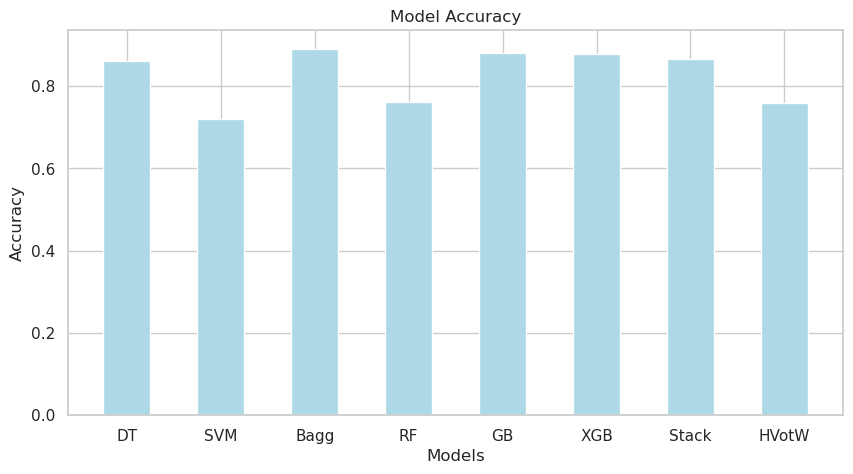

In [ ]:
fig = plt.figure(figsize=(10, 5))
mod = list(results.keys())
acc = list(results.values())
plt.bar(mod, acc, color ='lightblue', width = 0.5)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()

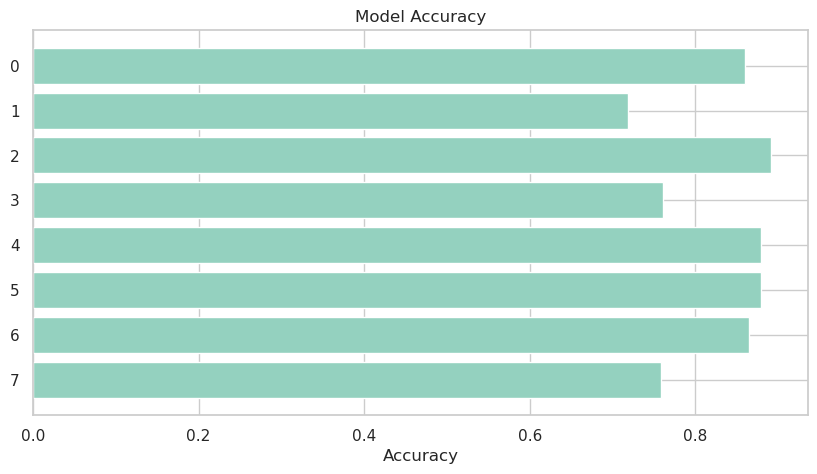

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
y_vals = np.arange(len(mod))
ax.barh(y_vals, acc, align='center')
ax.set_yticks(y_vals)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_title('Model Accuracy')
plt.show()

In [ ]:
print('Models Accuracy: ')
for k, v in results.items():
    print("%s \t %.2f" % (k, v))

Models Accuracy: 
DT 	 0.86
SVM 	 0.72
Bagg 	 0.89
RF 	 0.76
GB 	 0.88
XGB 	 0.88
Stack 	 0.87
HVotW 	 0.76


# Modelo

In [ ]:
df_energia = pd.read_csv('daasbstp2023/energia_202301-202304.csv', encoding='latin-1')
df_meteo = pd.read_csv('daasbstp2023/meteo_202301-202304.csv', encoding='latin-1')

In [ ]:
df_meteo['Data'] = meteo_2021['dt_iso'].str[:10]
df_meteo['Hora'] = meteo_2021['dt_iso'].str[11:13].astype(int)
df_meteo['Data'] = meteo_2022['dt_iso'].str[:10]
df_meteo['Hora'] = meteo_2022['dt_iso'].str[11:13].astype(int)

In [ ]:
energia_meteo = pd.merge(df_energia, df_meteo, on=["Data", "Hora"])

In [ ]:
energia_meteo.drop(['dt_iso'], axis=1, inplace=True)
energia_meteo.drop(['dt'], axis=1, inplace=True)

In [ ]:
energia_meteo.drop(['city_name'], axis=1, inplace=True)
energia_meteo.drop(['sea_level','grnd_level'],axis=1,inplace=True)

In [ ]:
energia_meteo.fillna(0,inplace=True)

In [147]:
energia_meteo.replace(replace_map, inplace=True)